In [ ]:
import pandas as pd
df2 = pd.read_csv("Intel_dataset_train.csv", index_col="Date", parse_dates=True)
df2 = df2.drop(columns=['Close'])
cols = df2.columns.to_list()
cols = cols[5:11] + cols[:3] + cols[4:5] + cols[3:4]
df2 = df2[cols]
print(df2)

          SOX   COMEX  OilFut  Volatility  USDINDEX   Open   High    Low  \
Date                                                                       
42006   686.7  1186.2   52.69       17.79     91.08  36.67  37.16  36.11   
42009   673.6  1204.0   50.04       19.92     91.38  36.20  36.45  35.94   
42010   658.8  1219.4   47.93       21.12     91.50  36.08  36.23  35.26   
42011   665.3  1210.7   48.65       19.31     91.89  35.64  36.07  35.27   
42012   684.6  1208.5   48.79       17.01     92.37  36.37  37.00  36.26   
...       ...     ...     ...         ...       ...    ...    ...    ...   
44918  2535.5  1804.2   79.34       20.87    104.31  25.92  26.19  25.68   
44922  2490.2  1823.1   79.77       21.65    104.18  25.85  26.10  25.65   
44923  2453.5  1815.8   78.60       22.14    104.46  25.84  26.12  25.50   
44924  2534.9  1826.0   78.61       21.44    103.84  25.77  26.29  25.75   
44925  2532.1  1826.2   80.47       21.67    103.52  25.90  26.46  25.80   

         Vo

In [ ]:
sc1 = MinMaxScaler()
sc2 = MinMaxScaler()

# 針對開盤價、最高價、最低價以及成交量我使用一組等化器
df2[['Open', 'High', 'Low', 'Volume','SOX','COMEX','OilFut','Volatility','USDINDEX']] = sc1.fit_transform(df2[['Open', 'High', 'Low', 'Volume','SOX','COMEX','OilFut','Volatility','USDINDEX']])
# 針對收盤價我使用另一個等化器，方便我將預測結果轉回來
df2[['Adj Close']] = sc2.fit_transform(df2[['Adj Close']])
df2

,SOX,COMEX,OilFut,Volatility,USDINDEX,Open,High,Low,Volume,Adj Close
Date,,,,,,,,,,
42006,0.036635,0.133948,0.375407,0.117607,0.097571,0.274672,0.266606,0.269663,0.100421,0.181861
42009,0.032871,0.151402,0.352098,0.146567,0.109326,0.263860,0.250399,0.265684,0.152465,0.174303
42010,0.028618,0.166503,0.333539,0.162882,0.114028,0.261100,0.245378,0.249766,0.141481,0.162022
42011,0.030486,0.157972,0.339872,0.138273,0.129310,0.250978,0.241726,0.250000,0.123778,0.175720
42012,0.036031,0.155815,0.341103,0.107002,0.148119,0.267771,0.262954,0.273174,0.146684,0.188002
...,...,...,...,...,...,...,...,...,...,...
44918,0.567853,0.739949,0.609816,0.159483,0.615987,0.027375,0.016206,0.025515,0.100394,0.116202
44922,0.554837,0.758482,0.613598,0.170088,0.610893,0.025765,0.014152,0.024813,0.134113,0.112896
44923,0.544292,0.751324,0.603307,0.176751,0.621865,0.025535,0.014609,0.021301,0.114999,0.103684


In [ ]:
X_train_set = df2.iloc[:,0:10].values

# 產生特徵資料和標籤資料
print(X_train_set)

[[0.03663477 0.13394783 0.37540681 ... 0.26966292 0.10042064 0.18186112]
 [0.03287073 0.15140224 0.35209781 ... 0.26568352 0.1524651  0.17430326]
 [0.02861822 0.16650324 0.33353857 ... 0.24976592 0.14148062 0.16202173]
 ...
 [0.54429216 0.75132379 0.60330724 ... 0.0213015  0.11499914 0.10368446]
 [0.56768095 0.76132575 0.6033952  ... 0.02715356 0.14203172 0.11903637]
 [0.56687642 0.76152187 0.61975548 ... 0.02832397 0.14251534 0.1242324 ]]


In [ ]:
def create_dataset(ds, look_back=1):
    X_data, Y_data = [],[]
    for i in range(len(ds)-look_back):
        X_data.append(ds[i:(i+look_back), 0:10])
        Y_data.append(ds[i+look_back, 9:10])

    return np.array(X_data), np.array(Y_data)


# 分割成特徵資料和標籤資料
X_train, Y_train = create_dataset(X_train_set, look_back)
print("回看天數:", look_back)
print("X_train Shape: ", X_train.shape)
print("Y_train Shape: ", Y_train.shape)

回看天數: 5
X_train Shape:  (2009, 5, 10)
Y_train Shape:  (2009, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(32, input_shape=(X_train.shape[1],10), return_sequences= True))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1))
model.summary()
model.compile(loss="MSE", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, Y_train, epochs=50, batch_size=64)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 5, 32)             5504      
                                                                 
 dropout_2 (Dropout)         (None, 5, 32)             0         
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 13857 (54.13 KB)
Trainable params: 13857 (54.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
32/32 [

In [ ]:
df_test = pd.read_csv("Intel_dataset_test.csv", index_col="Date",parse_dates=True)

df2 = df_test
df2 = df2.drop(columns=['Close'])
df2

,Open,High,Low,Adj Close,Volume,SOX,COMEX,OilFut,Volatility,USDINDEX
Date,,,,,,,,,,
44929,27.05,27.07,26.37,26.12,31308000,2501.0,1846.1,77.12,22.90,104.52
44930,27.41,27.92,27.16,27.05,37665200,2569.5,1859.0,73.10,22.01,104.25
44931,27.44,27.78,27.38,26.93,33552600,2518.5,1840.6,73.92,22.46,105.04
44932,27.93,28.83,27.38,28.07,31788600,2636.1,1869.7,74.04,21.13,103.88
44935,28.84,29.87,28.84,28.64,37493200,2686.8,1877.8,74.92,21.97,103.00
...,...,...,...,...,...,...,...,...,...,...
45236,38.02,38.20,37.85,37.95,23877200,3444.9,1988.6,80.82,14.89,105.21
45237,38.24,38.90,37.98,38.77,32052000,3471.5,1973.5,77.37,14.81,105.54
45238,38.85,38.89,37.75,37.92,33483400,3472.7,1957.8,75.33,14.45,105.59


In [ ]:
cols = df2.columns.to_list()
# 交換 column 順序
cols = cols[5:11] + cols[:3] + cols[4:5] + cols[3:4]
# 套用新的 column 順序
df2 = df2[cols]

# 調換順序後的df2
df2

,SOX,COMEX,OilFut,Volatility,USDINDEX,Open,High,Low,Volume,Adj Close
Date,,,,,,,,,,
44929,2501.0,1846.1,77.12,22.90,104.52,27.05,27.07,26.37,31308000,26.12
44930,2569.5,1859.0,73.10,22.01,104.25,27.41,27.92,27.16,37665200,27.05
44931,2518.5,1840.6,73.92,22.46,105.04,27.44,27.78,27.38,33552600,26.93
44932,2636.1,1869.7,74.04,21.13,103.88,27.93,28.83,27.38,31788600,28.07
44935,2686.8,1877.8,74.92,21.97,103.00,28.84,29.87,28.84,37493200,28.64
...,...,...,...,...,...,...,...,...,...,...
45236,3444.9,1988.6,80.82,14.89,105.21,38.02,38.20,37.85,23877200,37.95
45237,3471.5,1973.5,77.37,14.81,105.54,38.24,38.90,37.98,32052000,38.77
45238,3472.7,1957.8,75.33,14.45,105.59,38.85,38.89,37.75,33483400,37.92


In [ ]:
df2[['Open', 'High', 'Low', 'Volume','SOX','COMEX','OilFut','Volatility','USDINDEX']] = sc1.transform(df2[['Open', 'High', 'Low', 'Volume','SOX','COMEX','OilFut','Volatility','USDINDEX']])
df2[['Adj Close']] = sc2.transform(df2[['Adj Close']])
df2

,SOX,COMEX,OilFut,Volatility,USDINDEX,Open,High,Low,Volume,Adj Close
Date,,,,,,,,,,
44929,0.557940,0.781035,0.590289,0.187084,0.624216,0.053370,0.036293,0.041667,0.144091,0.131082
44930,0.577623,0.793685,0.554930,0.174983,0.613636,0.061652,0.055695,0.060159,0.180134,0.153047
44931,0.562969,0.775642,0.562143,0.181101,0.644592,0.062342,0.052499,0.065309,0.156817,0.150213
44932,0.596759,0.804177,0.563198,0.163018,0.599138,0.073614,0.076467,0.065309,0.146816,0.177137
44935,0.611327,0.812120,0.570939,0.174439,0.564655,0.094548,0.100205,0.099485,0.179159,0.190600
...,...,...,...,...,...,...,...,...,...,...
45236,0.829153,0.920769,0.622834,0.078178,0.651254,0.305728,0.290345,0.310393,0.101961,0.410487
45237,0.836796,0.905962,0.592488,0.077090,0.664185,0.310789,0.306323,0.313436,0.148309,0.429854
45238,0.837140,0.890567,0.574545,0.072196,0.666144,0.324822,0.306094,0.308052,0.156425,0.409778


In [ ]:
X_test_set = df2.iloc[:,0:10].values
X_test, Y_test = create_dataset(X_test_set, look_back)
X_test_pred = model.predict(X_test)
print(X_test_pred)

In [ ]:
X_test_pred_price = sc2.inverse_transform(X_test_pred)
print(X_test_pred_price)

[[27.98984 ]
 [28.571508]
 [29.02705 ]
 [29.532917]
 [29.8468  ]
 [29.908459]
 [29.773582]
 [29.481117]
 [29.210447]
 [29.189533]
 [29.39073 ]
 [29.684196]
 [29.883709]
 [29.178059]
 [28.504261]
 [28.057215]
 [27.896921]
 [28.066029]
 [28.842838]
 [29.196384]
 [29.437902]
 [29.499838]
 [29.246998]
 [28.927826]
 [28.866365]
 [28.886002]
 [29.03804 ]
 [29.186989]
 [29.174726]
 [28.658712]
 [27.809563]
 [27.041517]
 [26.43775 ]
 [26.073597]
 [25.927017]
 [25.939644]
 [25.969038]
 [26.202156]
 [26.44378 ]
 [26.613935]
 [26.687542]
 [26.697506]
 [26.696163]
 [26.868668]
 [27.34088 ]
 [27.900028]
 [28.479137]
 [28.999208]
 [29.528189]
 [29.753819]
 [29.829752]
 [29.79972 ]
 [29.693521]
 [29.720995]
 [29.922007]
 [30.071651]
 [30.35855 ]
 [30.834293]
 [31.444921]
 [32.126778]
 [32.57745 ]
 [32.844982]
 [32.983536]
 [33.051247]
 [32.917213]
 [32.788857]
 [32.653786]
 [32.571148]
 [32.485565]
 [32.36514 ]
 [32.11638 ]
 [31.816729]
 [31.339573]
 [30.744997]
 [30.266878]
 [29.816643]
 [29.68484 ]

In [47]:
Y_test = Y_test.reshape(212,1)
Y_test = sc.inverse_transform(Y_test)
print(Y_test)

ValueError: ignored

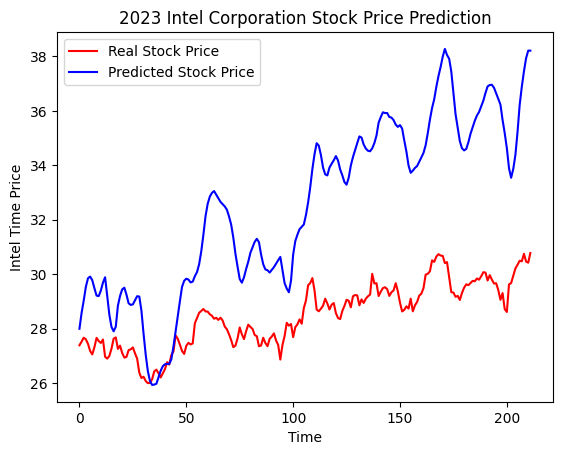

In [ ]:
import matplotlib.pyplot as plt

plt.plot(Y_test, color="red", label="Real Stock Price")
plt.plot(X_test_pred_price, color="blue", label="Predicted Stock Price")
plt.title("2023 Intel Corporation Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Intel Time Price")
plt.legend()
plt.show()